# DecisionTreeRegressor 
Ref: (https://www.kaggle.com/shubhankartiwari/decision-tree-regression)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


ram_prices = pd.read_csv("/content/sample_data/ram_price.csv") 
ram_prices.head()


,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Text(0, 0.5, 'Price in $/Mbyte')

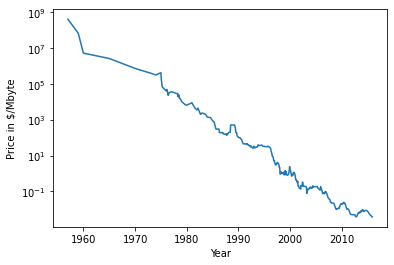

In [18]:
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte") 

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000] 

# predict prices based on date 
X_train = data_train.date [:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target 
y_train = np.log(data_train.price) 

tree = DecisionTreeRegressor().fit(X_train, y_train) 
linear_reg = LinearRegression().fit(X_train, y_train) 

# predict on all data 
X_all = ram_prices.date[:, np.newaxis] 
pred_tree = tree.predict(X_all) 
pred_lr = linear_reg.predict(X_all) 

# undo log-transform 
price_tree = np.exp(pred_tree) 
price_lr = np.exp(pred_lr) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


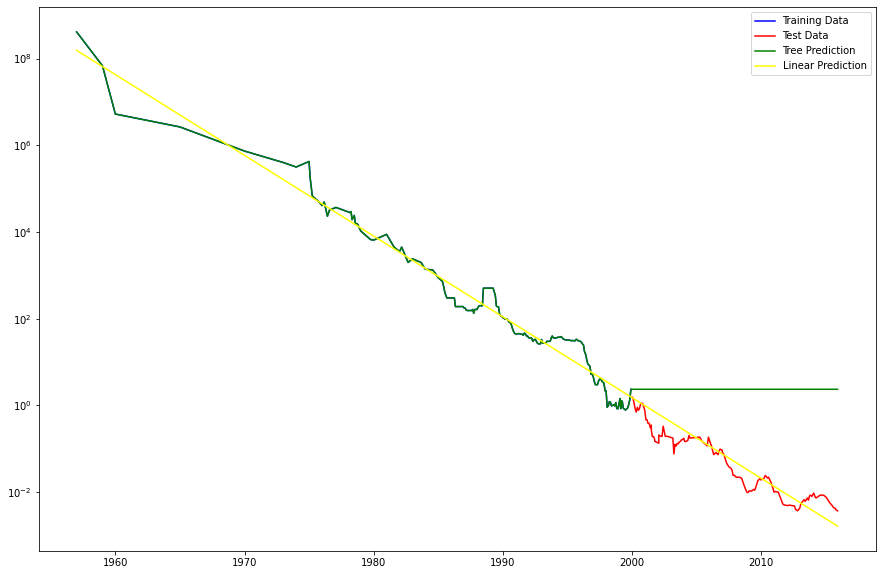

In [19]:
plt.figure(figsize=(15,10))
plt.semilogy(data_train.date,data_train.price,label="Training Data",color='blue')
plt.semilogy(data_test.date,data_test.price,label="Test Data",color='red')
plt.semilogy(ram_prices.date,price_tree,label="Tree Prediction",color='green')
plt.semilogy(ram_prices.date,price_lr,label="Linear Prediction",color='yellow')
plt.legend()
plt.show()